In [1]:
import os
import sys
import datetime

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleSkyPyLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo

In [2]:
dir = os.path.join(array_dir, 'sample_skypy_lens')

load all

In [3]:
grid_oversample = [1, 3, 5]
num_samples = [100, 1000, 10000, 100000, 1000000, 10000000]

ideal = np.load(os.path.join(dir, 'sample_skypy_lens_5_10000000.npy'))

all_files = glob(dir + '/sample_skypy_lens_*.npy')
grid_1 = [np.load(i) for i in all_files if '_1_' in i]
grid_3 = [np.load(i) for i in all_files if '_3_' in i]
grid_5 = [np.load(i) for i in all_files if '_5_' in i]

get $\chi^2$

In [13]:
chi_squared_1 = [stats.chi_square(i, ideal) for i in grid_1]
chi_squared_3 = [stats.chi_square(i, ideal) for i in grid_3]
chi_squared_5 = [stats.chi_square(i, ideal) for i in grid_5]

chi_squared = np.concatenate([chi_squared_1, chi_squared_3, chi_squared_5])

print(chi_squared_1)
print(chi_squared_3)
print(chi_squared_5)

[44.47417149858395, 4.46341063392928, 0.4520246664704855, 0.047892217116972176, 0.0037107126071774374, 0.0]
[29.448639875856056, 3.6473998874819182, 0.4303265590066219, 0.09800283365643636, 0.0772225588101175, 0.0]
[49.937659915297765, 4.46341063392928, 0.4520246664704855, 0.047892217116972176, 0.0037107126071774374, 0.0]


In [5]:
# print(len(num_samples))
# print(len(chi_squared_1), len(chi_squared_3), len(chi_squared_5))

In [10]:
execution_time = np.load(os.path.join(dir, 'execution_time.npy'))
execution_time_x = np.load(os.path.join(dir, 'execution_time_x.npy'))

print(execution_time_x)
print(execution_time)

[[       1      100]
 [       1     1000]
 [       1    10000]
 [       1   100000]
 [       1  1000000]
 [       1 10000000]
 [       3      100]
 [       3     1000]
 [       3    10000]
 [       3   100000]
 [       3  1000000]
 [       3 10000000]
 [       5      100]
 [       5     1000]
 [       5    10000]
 [       5   100000]
 [       5  1000000]
 [       5 10000000]]
[  46.78640771  111.19118428  292.64212465  759.74505997 1547.50726509
 1909.7716403    44.46815133  111.05647016  296.00301719  736.47531343
 1500.6906991  1963.35851693   45.55870271  111.06459332  298.47347569
  730.21777034 1597.93330121 2046.0866859 ]


In [11]:
execution_time = [str(datetime.timedelta(seconds=round(i))) for i in execution_time]

time_1, time_3, time_5 = [], [], []

for i, _ in enumerate(execution_time):
    time_1.append(execution_time[i])
    time_3.append(execution_time[i + len(execution_time) - 1])
    time_5.append(execution_time[i + (2 * len(execution_time)) - 2])

IndexError: list index out of range

In [12]:
print(execution_time)

['0:00:47', '0:01:51', '0:04:53', '0:12:40', '0:25:48', '0:31:50', '0:00:44', '0:01:51', '0:04:56', '0:12:16', '0:25:01', '0:32:43', '0:00:46', '0:01:51', '0:04:58', '0:12:10', '0:26:38', '0:34:06']


IndexError: list index out of range

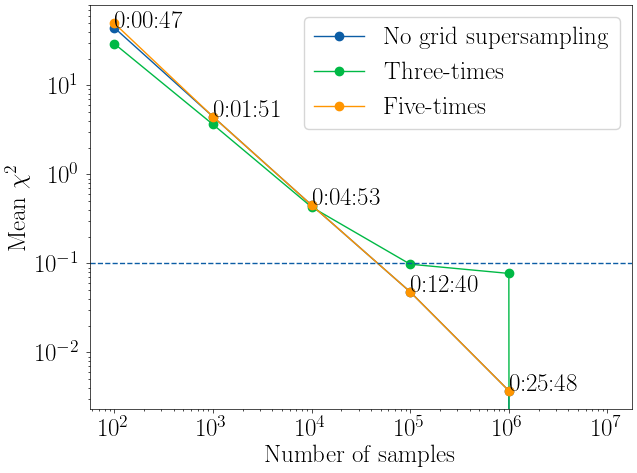

In [ ]:
f, ax = plt.subplots()  # figsize=(10,10)

ax.plot(num_samples, chi_squared_1, linestyle='-', marker='o', label='No grid supersampling')
ax.plot(num_samples, chi_squared_3, linestyle='-', marker='o', label='Three-times')
ax.plot(num_samples[:-1], chi_squared_5[:-1], linestyle='-', marker='o', label='Five-times')
plt.axhline(y=0.1, linestyle='--')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of samples')
plt.ylabel('Mean $\chi^2$')

for i, txt in enumerate(execution_time):
    ax.annotate(txt, (num_samples[i], chi_squared[i]))

plt.savefig(os.path.join(figure_dir, 'calc_params.png'))
plt.show()